# ***TRABAJO INTEGRADOR I-***
DATOS BASADOS EN INFORMACIÓN PÚBLICA EN ARGENTINA
---
---



### **Acceso a los diferentes dataset y visualizacion**


#### Los dataset podran ser descargado del siguiente [enlace de drive](https://drive.google.com/drive/folders/1J-R6fricR7D1uf9g_Cg8gbIMajCe-eYw?usp=sharing). 
En algunos casos los datase contiene información de diferentes periodos de tiempo y etiquetas de las variables con nomenclatura específica. Para tener referencia de los datos de cada variables de la base de datos consultar en los siguientes enlaces según el dataset elegido.



|    | Tema | Nombre del archivo | Enlace |
|--- |---   |         ---        |   ---  |
1   | .... | spam.csv  |  ....   |
2   | supermercados| ventas-supermercados-2.csv  | [dataset de supermercados](https://www.datos.gob.ar/dataset/sspm_455/archivo/sspm_455.1) |
3   | Mercado Central de Bs As |precios-mercadocentral.csv| [dataset de mercado](https://datos.gob.ar/ar/dataset/agroindustria-frutas-hortalizas---precios-mayoristas/archivo/agroindustria_6dce1e87-7988-4eaf-b0e1-b3abbb3964da)

### ***Datos del alumno***

Franco, Cristian, 39039686, cristianprogramadorunsa@gmail.com

### ***Dataset elegido:*** 

Mercado Central de Bs. As

**Elegimos este dataset debido a:**
* La facilidad para crear relaciones entre las variables
* La utilidad que tendria en la cotidianeidad.
* La similitud con las clases practicas.

**Problematica**

Necesitamos saber cuál sera el precio de una fruta, dado el nombre de dicha fruta. Esto sabiendo que el año, el pais y demas factores no se tomaran en cuenta.

**Impacto**

Como ya se dijo, es de uso cotidiano relacionar el nombre de un producto con su precio agregandole claro, la importancia o época de dicho producto. Por lo que será de mucha utilidad para la sociedad anticipar precios de algo tan cotidiano como las frutas y las verduras. Esto servirá además para facilitar la administración realista y actual de la economía hogareña.

**Objetivo**

Espero poder predecir el precio de las frutas y verduras, dado su nombre, y que al hacerlo obtengamos un minimo error respecto a la realidad. Tratare de conseguir datos mas actuales dentro del mercado para probar el modelo y verificar si nos aproximamos a la actualidad, dado que los datos del dataset pertenecen a los años 2017 y 2018.


  

### ***Empecemos***

In [2]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### ***1- Ingreso el DATA SET***

In [3]:
#Subir archivo en la carpetita que aparece a la izquierda del colab, luego copiar la ruta y subirlo con las librerias necesarias

df = pd.read_csv('./precios-mercadocentral.csv', encoding='ISO-8859-1')

### ***2- Aplico PROCESO de AED***

In [4]:
# Aqui veremos medidas de estadistica descriptiva
# Estas medidas seran sobre las variables cuantitativas del dataset 
df.describe()

,pais_id,año,precio_usd_kg
count,828.0,828.000000,767.000000
mean,32.0,2017.376812,1.262360
std,0.0,0.484880,1.437011
min,32.0,2017.000000,0.000000
25%,32.0,2017.000000,0.470000
50%,32.0,2017.000000,0.860000
75%,32.0,2018.000000,1.460000
max,32.0,2018.000000,11.230000


In [35]:
# En este caso nos informará sobre el nombre, tipo de dato y cuantas filas de dicha columna poseen valor nulo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pais_id        828 non-null    int64  
 1   pais           828 non-null    object 
 2   mercado        828 non-null    object 
 3   año            828 non-null    int64  
 4   mes            828 non-null    object 
 5   producto       828 non-null    object 
 6   variedad       828 non-null    object 
 7   origen         828 non-null    object 
 8   precio_usd_kg  767 non-null    float64
 9   moneda_cod     828 non-null    object 
 10  moneda         828 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 71.3+ KB


In [6]:
# Veremos las primeras 5 filas
df.head()

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares


In [7]:
# Veremos las últimas 5 filas
df.tail()

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
823,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Repollo,s/especificar,s/especificar,0.36,USD,Dolares
824,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Tomate,s/especificar,s/especificar,1.15,USD,Dolares
825,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zanahoria,s/especificar,s/especificar,0.29,USD,Dolares
826,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallito,s/especificar,s/especificar,1.01,USD,Dolares
827,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallo,s/especificar,s/especificar,0.32,USD,Dolares


#### ***Ahora procederemos a graficar para visualizar mejor nuestro dataset***
Esto para poder identificar las cantidades de los diferentes valores que cada columna toma a lo largo de las filas.

Como esto sera aplicado a todas las columnas entonces creare una funcion que grafique para reutilizar codigo

***Creamos la funcion graficar***

Esta funcion creara una figura en la cual insertaremos 3 graficas:
1. Grafica de torta, la cual contiene los 5 datos mas relevantes de un determinado grupo (pasado por parametro).
2. Grafica de barras, para una vision distinta de los 5 datos mas relevantes del grupo nombrado antes.
3. Grafica de barras, para mostrar los 5 datos menos relevantes del grupo en cuestión.

In [10]:
def graficar(grupo, titles, xlabels, ylabels):
    # Aumentamos el tamaño de la imagen
    plt.figure(figsize=(15,10))

    # preparamos los subplots y graficamos primero el pie y luego los graficos de barras
    plt.subplot(2,2,1)
    plt.title(titles[0])
    graf_pie = grupo.count().sort_values(axis=0, inplace=False, ascending=False)[:5].plot.pie()
    plt.xlabel('')
    plt.ylabel('')


    ax = plt.subplot(2, 2, 2)
    x = grupo.count().sort_values(axis=0, inplace=False, ascending=False)[:5].index.values.astype(str)
    y = grupo.count().sort_values(axis=0, inplace=False, ascending=False)[:5].values
    plt.bar(x, y)
    plt.title(titles[1])
    plt.xlabel(xlabels[0])
    plt.ylabel(ylabels[0])
    # Para mas prolijidad y claridad tomaremos los colores del grafico de torta, lo asignaremos al grafico de barra.
    wedges = graf_pie.patches
    colors_pie = [wedge.get_facecolor() for wedge in wedges]
    for i, rect in enumerate(ax.patches):
        rect.set_facecolor(colors_pie[i])
    # Por ultimo pondremos las respectivas cantidades encima de cada barra y le quitaremos los labels de ambos ejes.
    for i, v in enumerate(y):
        ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')
        ax.set_yticklabels([])
    ax.set_xticklabels([])


    ax = plt.subplot(2, 2, (3, 4))
    x = grupo.count().sort_values(axis=0, inplace=False, ascending=True)[:5].index.values.astype(str)
    y = grupo.count().sort_values(axis=0, inplace=False, ascending=True)[:5].values
    plt.bar(x, y)
    plt.title(titles[2])
    plt.xlabel(xlabels[1])
    plt.ylabel(ylabels[1])
    plt.show()


#### ***Veamos cuantas frutas tienen los mismos pais_id (y por ende provienen del mismo pais)***

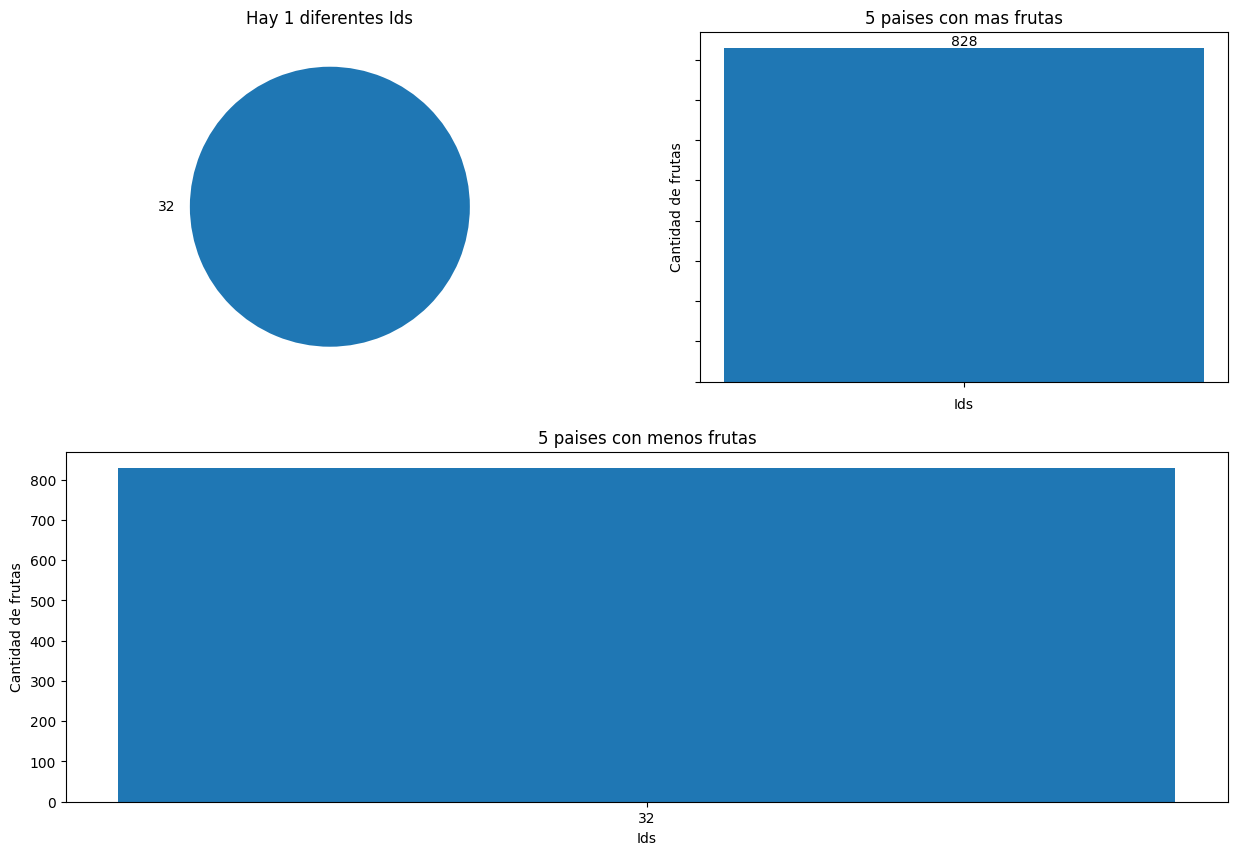

In [14]:
grupo = df.groupby('pais_id')['pais_id']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Ids', '5 paises con mas frutas', '5 paises con menos frutas']
xlabels = ['Ids', 'Ids']
ylabels = ['Cantidad de frutas', 'Cantidad de frutas']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos cuantas frutas provienen de un mismo mercado***

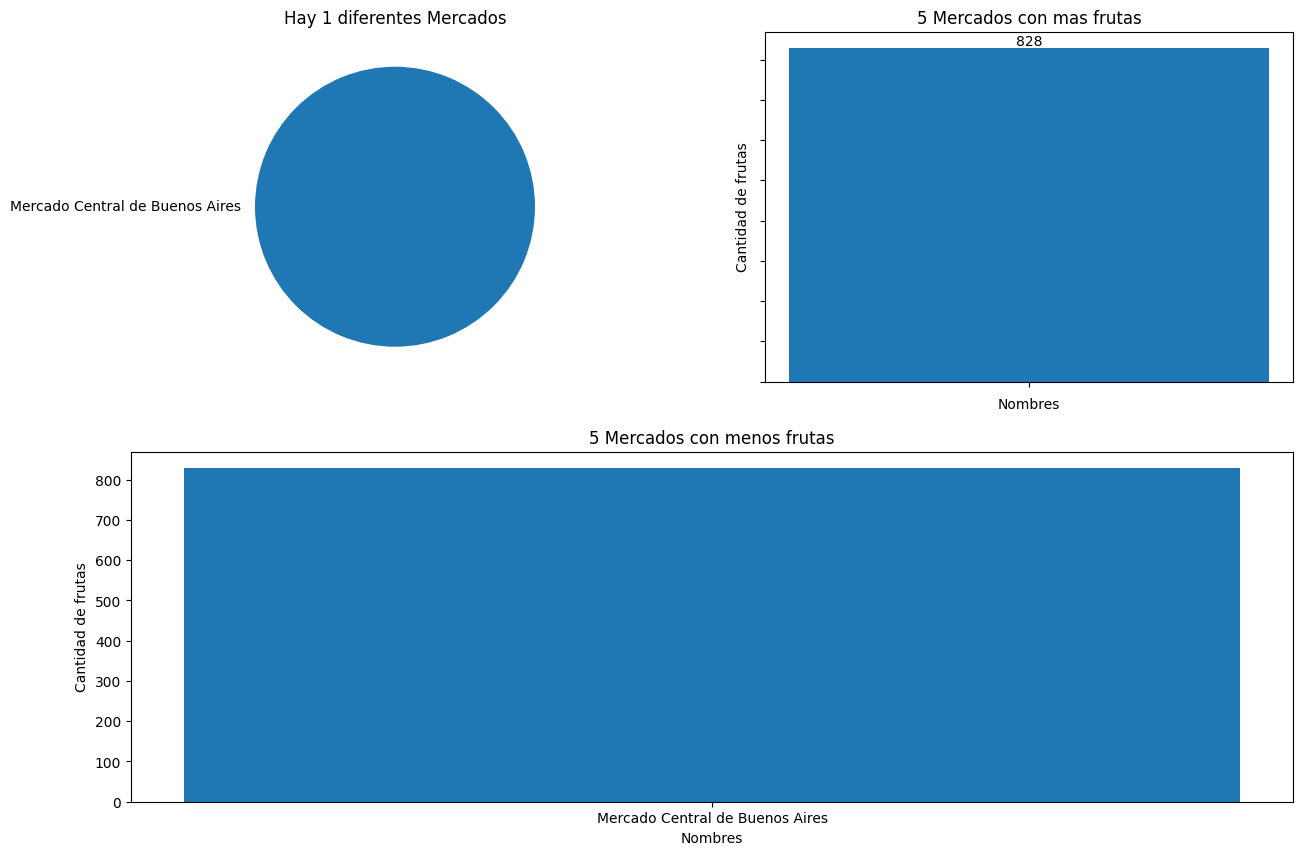

In [15]:
grupo = df.groupby('mercado')['mercado']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Mercados', '5 Mercados con mas frutas', '5 Mercados con menos frutas']
xlabels = ['Nombres', 'Nombres']
ylabels = ['Cantidad de frutas', 'Cantidad de frutas']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos cuantas frutas pertenecen a un mismo año***

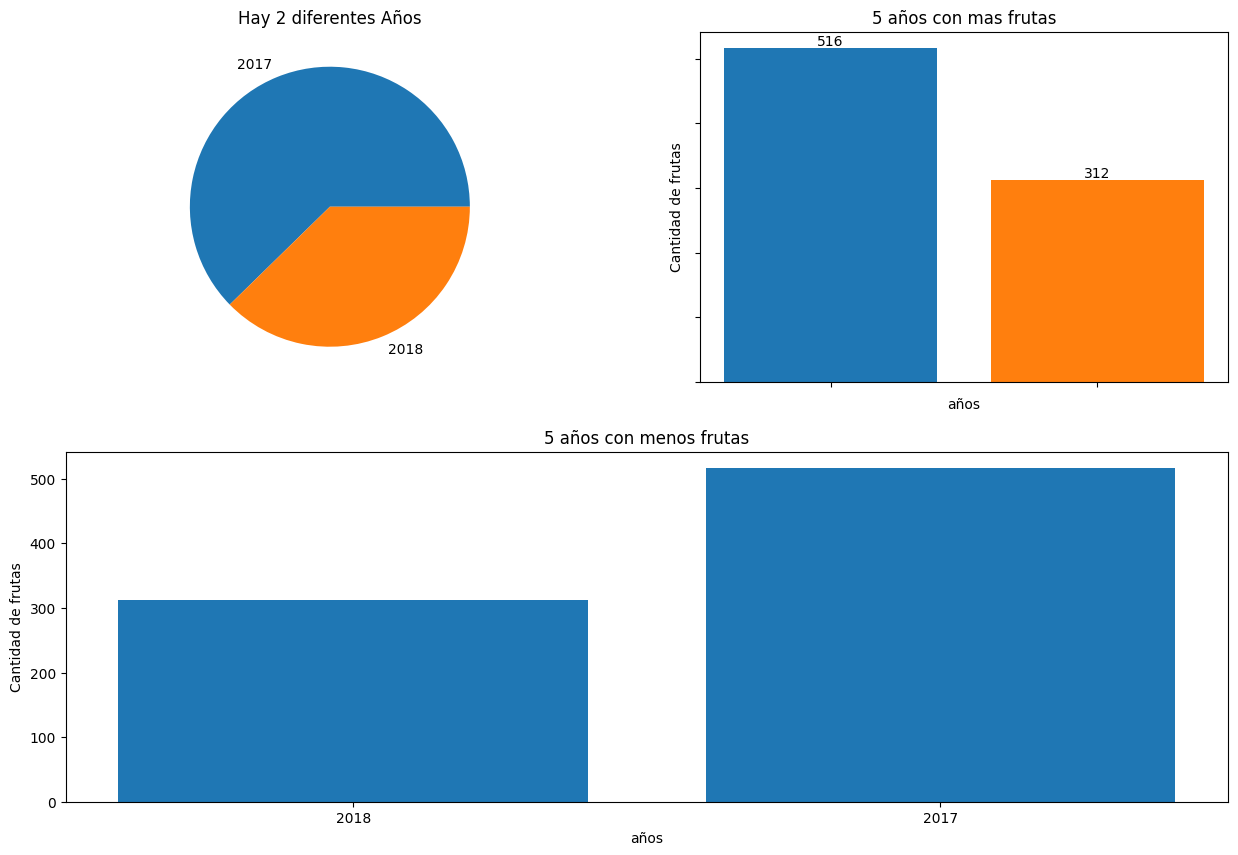

In [17]:
grupo = df.groupby('año')['año']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Años', '5 años con mas frutas', '5 años con menos frutas']
xlabels = ['años', 'años']
ylabels = ['Cantidad de frutas', 'Cantidad de frutas']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos cuantas frutas pertenecen a un mismo mes***

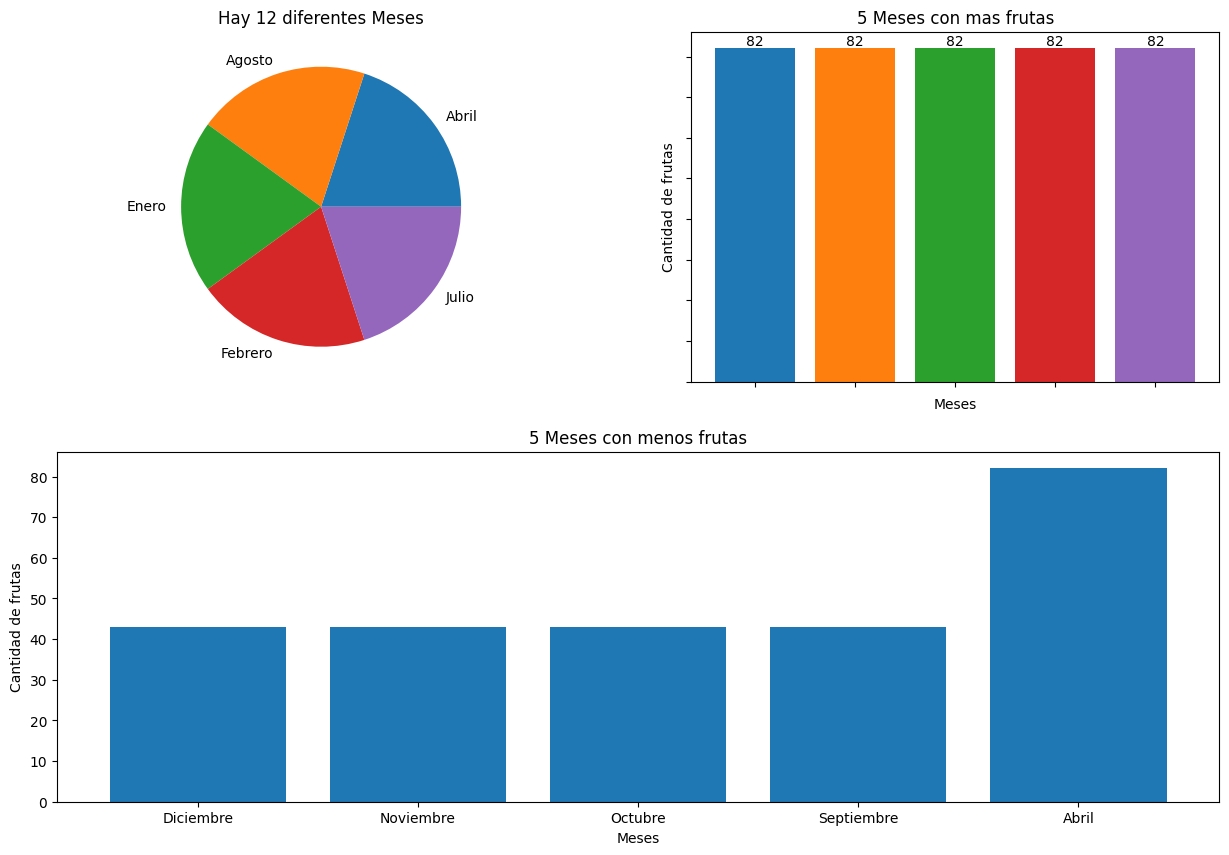

In [18]:
grupo = df.groupby('mes')['mes']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Meses', '5 Meses con mas frutas', '5 Meses con menos frutas']
xlabels = ['Meses', 'Meses']
ylabels = ['Cantidad de frutas', 'Cantidad de frutas']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos cuantos frutas diferentes hay***

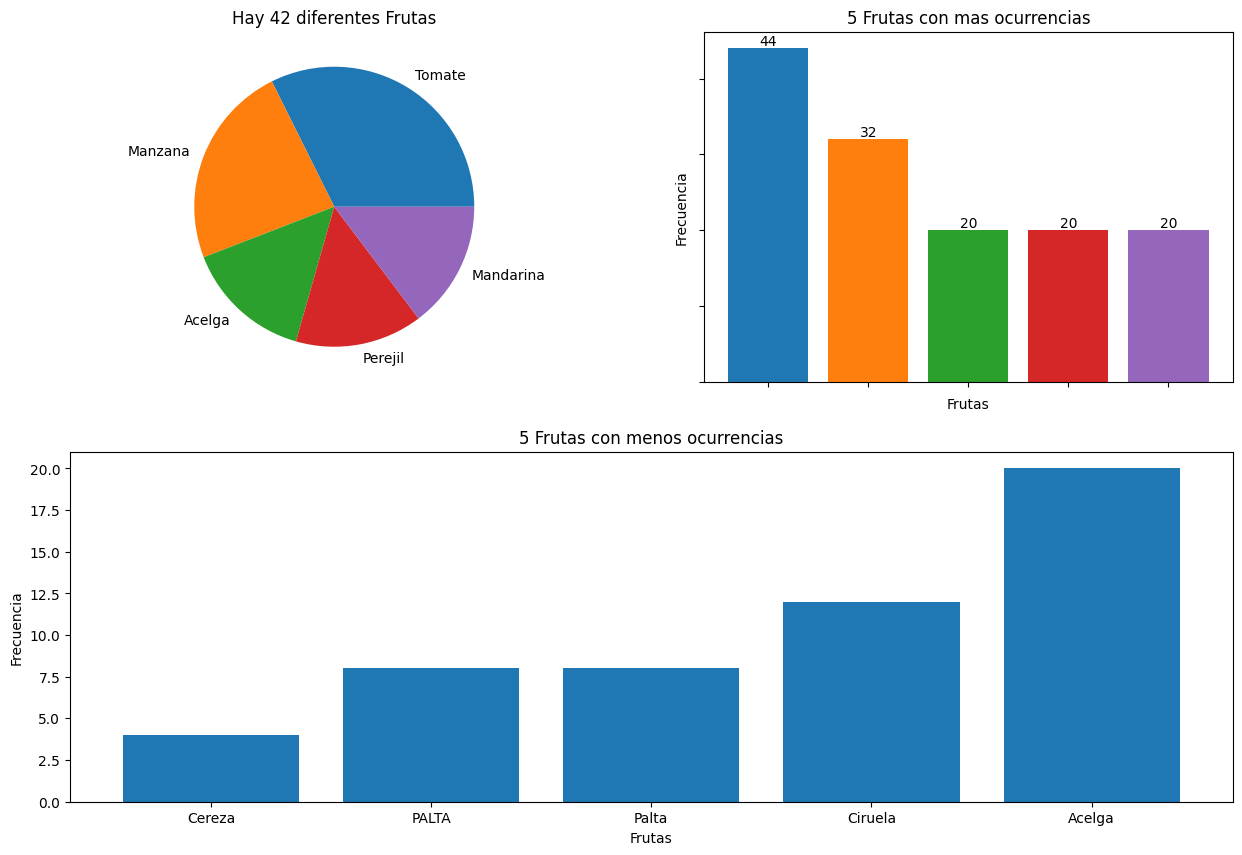

In [23]:
grupo = df.groupby('producto')['producto']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Frutas', '5 Frutas con mas ocurrencias', '5 Frutas con menos ocurrencias']
xlabels = ['Frutas', 'Frutas']
ylabels = ['Frecuencia', 'Frecuencia']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos cuantas frutas pertenecen a la misma variedad***

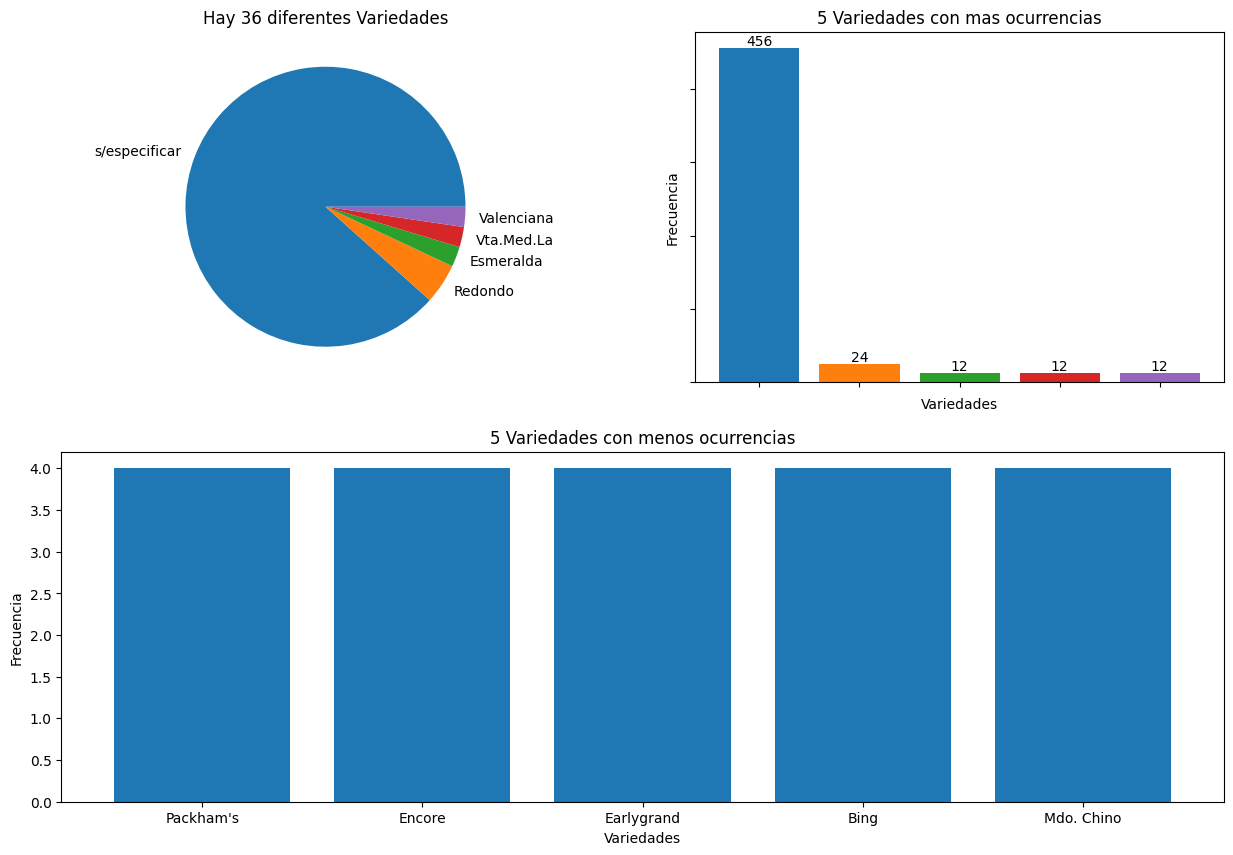

In [20]:
grupo = df.groupby('variedad')['variedad']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Variedades', '5 Variedades con mas ocurrencias', '5 Variedades con menos ocurrencias']
xlabels = ['Variedades', 'Variedades']
ylabels = ['Frecuencia', 'Frecuencia']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos cuantas frutas tienen los mismos lugares de origen***

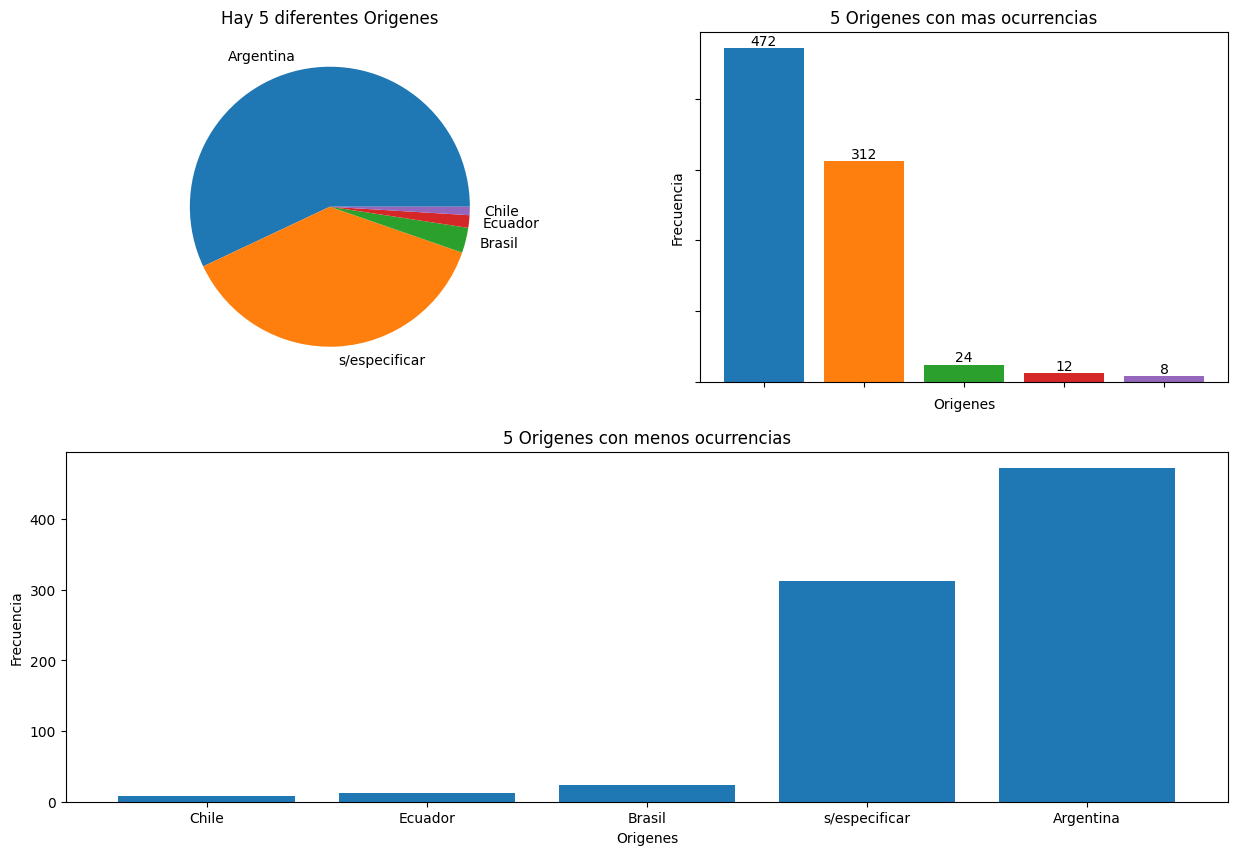

In [21]:
grupo = df.groupby('origen')['origen']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Origenes', '5 Origenes con mas ocurrencias', '5 Origenes con menos ocurrencias']
xlabels = ['Origenes', 'Origenes']
ylabels = ['Frecuencia', 'Frecuencia']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos ahora cuantas frutas tienen un mismo moneda_cod (y por ende la misma moneda)***

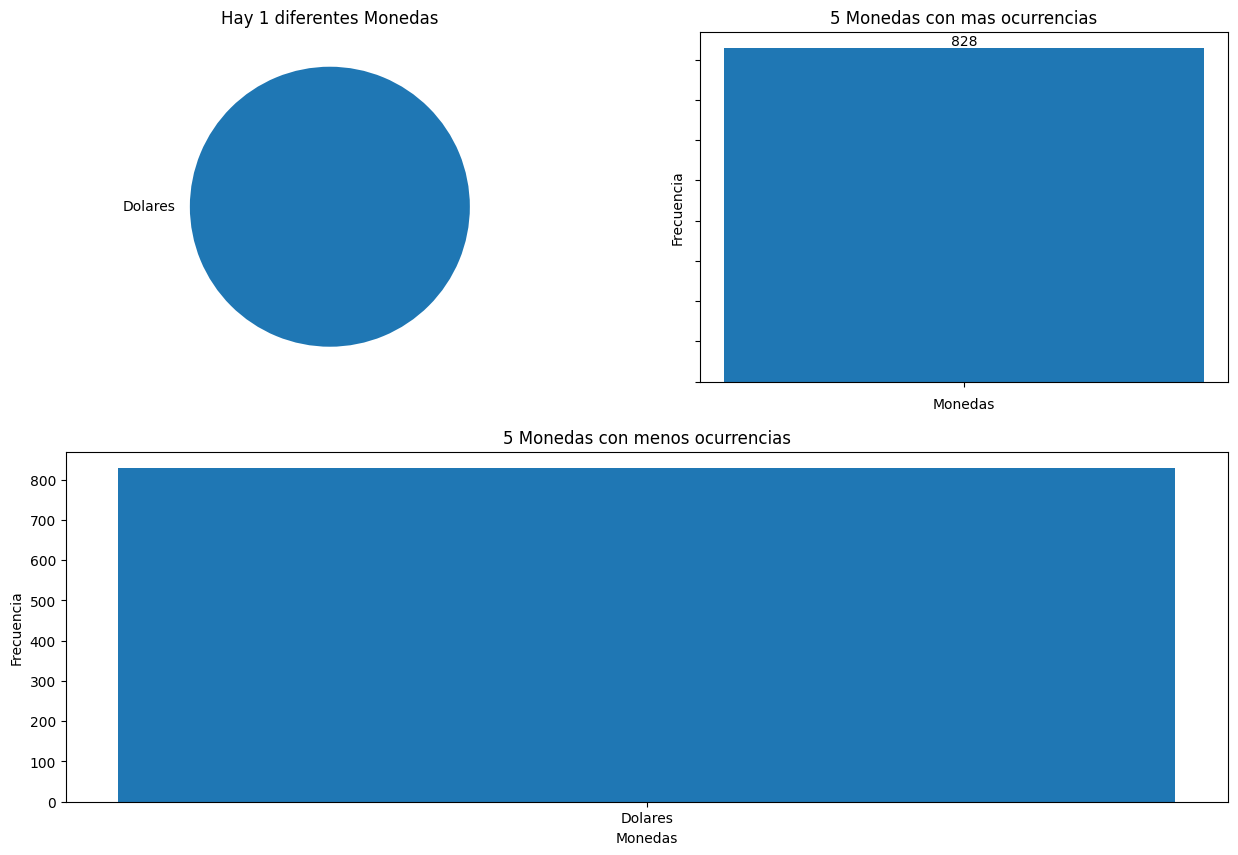

In [22]:
grupo = df.groupby('moneda_cod')['moneda_cod']
cantidad = len(grupo.count())

titles = [f'Hay {cantidad} diferentes Monedas', '5 Monedas con mas ocurrencias', '5 Monedas con menos ocurrencias']
xlabels = ['Monedas', 'Monedas']
ylabels = ['Frecuencia', 'Frecuencia']
graficar(grupo, titles, xlabels, ylabels)

#### ***Veamos el rango de precios por kg de las frutas y verduras***

Para esto necesitare graficos referidos a las variables cuantitativas continuas

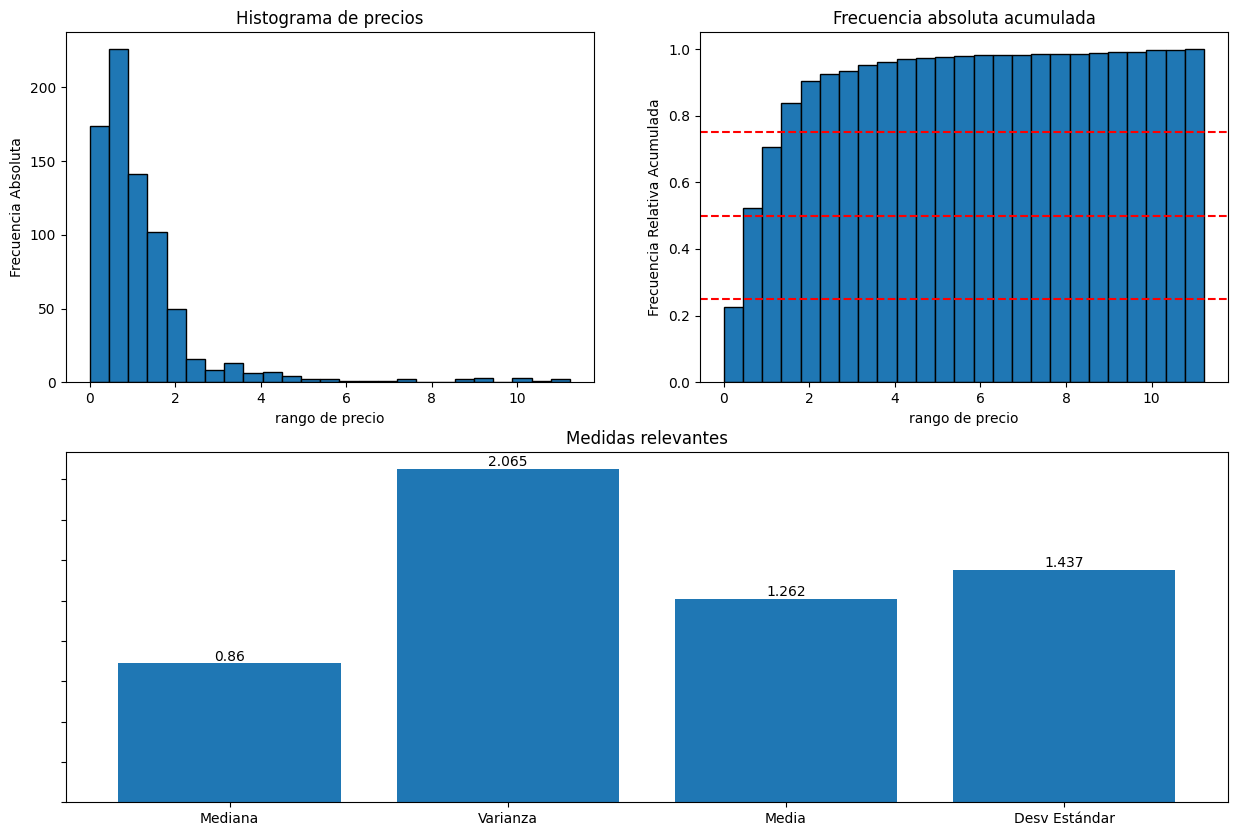

In [51]:
datos = df['precio_usd_kg']
intervalos = 25
titles = ['Histograma de precios', 'Frecuencia absoluta acumulada', 'Medidas relevantes']
xlabels = 'rango de precio'

ylabels = ['Frecuencia Absoluta', 'Frecuencia Relativa Acumulada']

plt.figure(figsize=(15,10))

# Graficamos el histograma de la frecuencia absoluta.
plt.subplot(2, 2, 1)
plt.hist(datos, bins=intervalos, edgecolor='black')
plt.title(titles[0])
plt.xlabel(xlabels)
plt.ylabel(ylabels[0])


# Graficamos la frecuencia relativa acumulada y 3 lineas separando el 25%, 50% y 75% de los datos.
plt.subplot(2, 2, 2)
plt.hist(datos, bins=intervalos, edgecolor='black', density=True, cumulative=True) 
plt.title(titles[1])   
plt.axhline(y=0.25, color='r', linestyle='--') 
plt.axhline(y=0.5, color='r', linestyle='--') 
plt.axhline(y=0.75, color='r', linestyle='--')
plt.xlabel(xlabels)
plt.ylabel(ylabels[1])

#Graficamos las medidas mas relevantes
mediana = datos.median()
varianza = datos.var()
media = datos.mean()
desv_est = datos.std()

x = ['Mediana', 'Varianza', 'Media', 'Desv Estándar']
y = [mediana, varianza, media, desv_est]
ax = plt.subplot(2, 2, (3, 4))
plt.bar(x, y)
plt.title(titles[2])
for i, v in enumerate(y):
    ax.annotate(str(round(v, 3)), xy=(i, v), ha='center', va='bottom')
    ax.set_yticklabels([])

plt.show()

#### ***Conclusion del AED***

1. Solo tenemos futas con pais_id = 32 y por ende pais = Argentina.
2. Todas las frutas provienen del Mercado Central de Bs As.
3. Los datos son de los años 2017-2018.
4. Los meses que encontraremos seran los 12.
5. Hay 42 diferentes frutas, considerando que PALTA y palta son distintas.
6. Hay 36 diferentes variedades.
7. Hay 5 diferentes lugares de origen.
8. Todas las frutas poseen el mismo moneda_cod y por ende la misma moneda.
9. El rango de precios es (0; 11.23] dolares por kg, entre 50%-75% frutas y verduras vale menos de 2 dolares. Y esta columna contiene valores nulos.


### ***3- Aplico PROCESO DE LIMPIEZA***

***Dadas las conclusiones anteriores puedo:***
1. Descartar las siguientes columnas:
    * pais_id, pais, mercado, moneda_cod y moneda
2. Limpiar la columna precio_usd_kg, eliminando las filas nulas
3. Trataremos de graficar el boxplot de la columna precio_usd_kg despues de eliminar las filas nulas, para ver si existen valores aislados

In [36]:
# Eliminamos las columnas nombradas
df = df.drop(columns=['pais_id','pais','mercado','moneda_cod','moneda'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   año            828 non-null    int64  
 1   mes            828 non-null    object 
 2   producto       828 non-null    object 
 3   variedad       828 non-null    object 
 4   origen         828 non-null    object 
 5   precio_usd_kg  767 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 38.9+ KB


In [47]:
# Procedemos a limpiar la columna precio_usd_kg
# En este caso vamos primero a contar cuantas filas contienen nulos y dependiendo de eso eliminamos esas filas o las reemplazamos convenientemente
cantidad = df["precio_usd_kg"].isnull().sum()
porcentaje = cantidad / df['precio_usd_kg'].count()
print(f'La cantidad de filas con valores null en la columna precio_usd_kg es: {cantidad}')
print(f'Como dichas filas representan el {format(porcentaje, ".2f")}% aprox. decidimos eliminarlas' )
df = df.dropna()
df.info()

La cantidad de filas con valores null en la columna precio_usd_kg es: 61
Como dichas filas representan el 0.08% aprox. decidimos eliminarlas
<class 'pandas.core.frame.DataFrame'>
Index: 767 entries, 0 to 827
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   año            767 non-null    int64  
 1   mes            767 non-null    object 
 2   producto       767 non-null    object 
 3   variedad       767 non-null    object 
 4   origen         767 non-null    object 
 5   precio_usd_kg  767 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 41.9+ KB


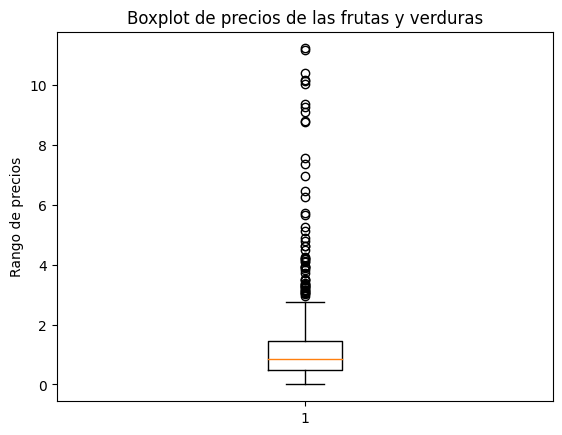

In [49]:
plt.boxplot(df['precio_usd_kg'])
plt.ylabel('Rango de precios')
plt.title('Boxplot de precios de las frutas y verduras')
plt.show()


Vemos que tenemos muchos valores aislados, lo cual implica que debemos asignarles un valor en particular para evitar que se alejen de esta situacion pero que al mismo tiempo no se alejen de la realidad. Quizas en este punto lo mejor sea separar los precios por las distintas frutas, dado que hay frutas que son en promedio mas baratas y otras por lo contrario son en promedio mas caras.

## 4- Aplicar PROCESO para DEFINIR tu X e Y para APLICAR REGRESION LINEAL Y LOGISTICA segun el DATA SET a las variables que consideres adecuadas. RECUERDA ESTANDARIZAR LAS VARIABLES PARA CORRELACIÓN LOGÍSTICA.

## 5- Aplicar alguna METRICAS de EVALUACION a los modelos anteriores y justificar la elección de dicha métrica.

## 6- Sacar una conclusión en función de los resultados, errores, y predicciones.

## 7- Aplicar un MODELO DE APRENDIZAJE NO SUPERVISADO (k-means, arbol de  decisión, KNN) Con el resultado obtenido del algoritmo de agrupamiento elegido, agregar al dataset una columna con esta nueva variables del grupo al que pertenece cada dato.


# 8- Generar una conclusión con relación a como podría obtener mejores datos en este dataset, o que información considera importante que se podria evaluar para mejorar su predicción encontrada.